In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Load the dataset
file_path = "Bakery.csv"
df = pd.read_csv(file_path)

# Grouping items by transactions
transactions = df.groupby("TransactionNo")["Items"].apply(list).tolist()

# Applying Transaction Encoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [35]:
# Apply Apriori Algorithm
min_support = 0.1  # 10% support threshold
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
top_items = frequent_itemsets.nlargest(10, 'support')
print("Frequent Itemsets:")
print(top_items)

print()

# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print("Association Rules:")
print(rules)

Frequent Itemsets:
    support  itemsets
2  0.478394  (Coffee)
0  0.327205   (Bread)
3  0.142631     (Tea)
1  0.103856    (Cake)

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


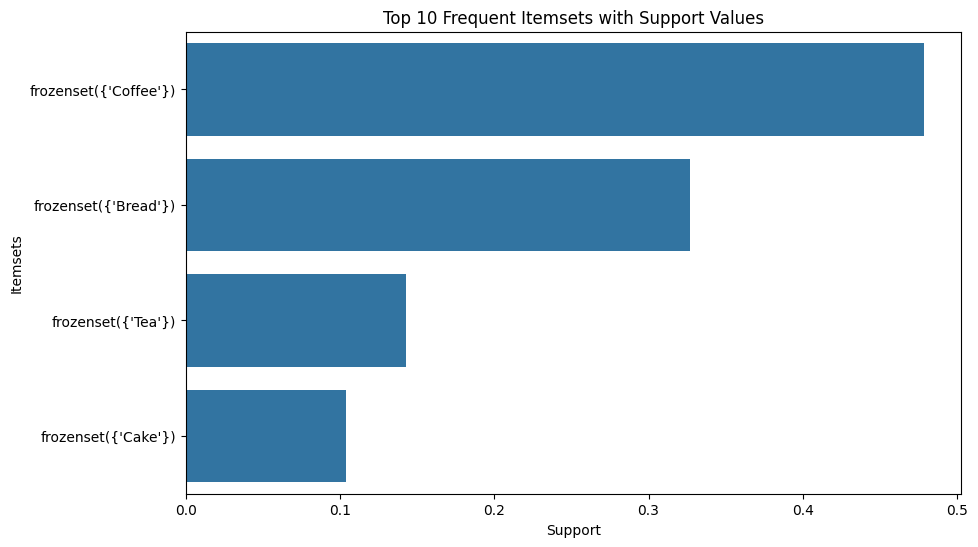

In [36]:
# Plotting Frequent Itemsets
plt.figure(figsize=(10, 6))
sns.barplot(x=top_items['support'], y=top_items['itemsets'].astype(str))
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.title("Top 10 Frequent Itemsets with Support Values")
plt.show()

In [37]:
# Plotting Association Rules
if not rules.empty:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=rules['support'], y=rules['confidence'], size=rules['lift'], hue=rules['lift'], palette='viridis', alpha=0.7)
    plt.xlabel("Support")
    plt.ylabel("Confidence")
    plt.title("Association Rules (Support vs Confidence, Bubble Size = Lift)")
    plt.legend(title="Lift")
    plt.show()
else:
    print("No association rules found with the given parameters.")

No association rules found with the given parameters.
